## Introduction
BikeShare Cyclist a fictional bike transportation company based in Chicago, Illinois is faced with the issue of converting casual bike riders into members. I received a data set which includes members and casual riders transport details for four quarters in the year 2019, with the data provided I was able to perform operations like cleaning, manipulation, analysis and visualization all in R stuido and came up with a recommended solution to the issue they were faced with. This is a perfect example of using data to drive decision-making.

## Loading Packages

In [1]:
library('tidyverse')
library('lubridate')
library('ggplot2')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




## Loading Datasets

In [2]:
q1_2019 <- read.csv('../input/google-data-analytics-capstone-1-data-set/Divvy_Trips_2019_Q1.csv')
q2_2019 <- read.csv('../input/google-data-analytics-capstone-1-data-set/Divvy_Trips_2019_Q2.csv')
q3_2019 <- read.csv('../input/google-data-analytics-capstone-1-data-set/Divvy_Trips_2019_Q3.csv')
q4_2019 <- read.csv('../input/google-data-analytics-capstone-1-data-set/Divvy_Trips_2019_Q4.csv')

In [3]:
colnames(q1_2019)
colnames(q2_2019)
colnames(q3_2019)
colnames(q4_2019)

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "X01...Rental.Details.Rental.ID"                   
 [2] "X01...Rental.Details.Local.Start.Time"            
 [3] "X01...Rental.Details.Local.End.Time"              
 [4] "X01...Rental.Details.Bike.ID"                     
 [5] "X01...Rental.Details.Duration.In.Seconds.Uncapped"
 [6] "X03...Rental.Start.Station.ID"                    
 [7] "X03...Rental.Start.Station.Name"                  
 [8] "X02...Rental.End.Station.ID"                      
 [9] "X02...Rental.End.Station.Name"                    
[10] "User.Type"                                        
[11] "Member.Gender"                                    
[12] "X05...Member.Details.Member.Birthday.Year"

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

## Data Cleaning

In [4]:
q1_2019 <- rename(q1_2019, ride_id=trip_id,
                  rideable_type=bikeid,
                  started_at=start_time,
                  ended_at=end_time,
                  start_station_name=from_station_name,
                  end_station_name=to_station_name,
                  member_casual=usertype
                  ) 
q1_2019 <- rename(q1_2019, start_station_id=from_station_id,
                  end_station_id=to_station_id)
q2_2019 <- rename(q2_2019, ride_id=X01...Rental.Details.Rental.ID,
                  rideable_type=X01...Rental.Details.Bike.ID,
                  started_at=X01...Rental.Details.Local.Start.Time,
                  ended_at=X01...Rental.Details.Local.End.Time,
                  start_station_name=X03...Rental.Start.Station.Name,
                  end_station_name=X02...Rental.End.Station.Name,
                  member_casual=User.Type,
                  tripduration=X01...Rental.Details.Duration.In.Seconds.Uncapped,
                  start_station_id=X03...Rental.Start.Station.ID,
                  end_station_id=X02...Rental.End.Station.ID,
                  gender=Member.Gender,
                  birthyear=X05...Member.Details.Member.Birthday.Year)
q3_2019 <- rename(q3_2019, ride_id=trip_id,
                  rideable_type=bikeid,
                  started_at=start_time,
                  ended_at=end_time,
                  start_station_name=from_station_name,
                  end_station_name=to_station_name,
                  member_casual=usertype,
                  start_station_id=from_station_id,
                  end_station_id=to_station_id)
q4_2019 <- rename(q4_2019, ride_id=trip_id,
                  rideable_type=bikeid,
                  started_at=start_time,
                  ended_at=end_time,
                  start_station_name=from_station_name,
                  end_station_name=to_station_name,
                  member_casual=usertype,
                  start_station_id=from_station_id,
                  end_station_id=to_station_id)

In [5]:
q1_2019 <- mutate(q1_2019, ride_id=as.character(ride_id))
q2_2019 <- mutate(q2_2019, ride_id=as.character(ride_id))
q3_2019 <- mutate(q3_2019, ride_id=as.character(ride_id))
q4_2019 <- mutate(q4_2019, ride_id=as.character(ride_id))

In [6]:
print(paste('Number of rows and columns for q1_2019: ',
            nrow(q1_2019), 'rows and', ncol(q1_2019), ' columns'))
print(paste('Number of rows and columns for q1_2019: ',
            nrow(q2_2019), 'rows and', ncol(q2_2019), ' columns'))
print(paste('Number of rows and columns for q1_2019: ',
            nrow(q3_2019), 'rows and', ncol(q3_2019), ' columns'))
print(paste('Number of rows and columns for q1_2019: ',
            nrow(q4_2019), 'rows and', ncol(q4_2019), ' columns'))

[1] "Number of rows and columns for q1_2019:  365069 rows and 12  columns"
[1] "Number of rows and columns for q1_2019:  1108163 rows and 12  columns"
[1] "Number of rows and columns for q1_2019:  1640718 rows and 12  columns"
[1] "Number of rows and columns for q1_2019:  704054 rows and 12  columns"


### Binding datasets

In [7]:
bike_trips_2019 <- bind_rows(q2_2019,q3_2019,q4_2019,q1_2019)

In [8]:
colnames(bike_trips_2019)
nrow(bike_trips_2019)
dim(bike_trips_2019)

[1] "ride_id"            "started_at"         "ended_at"          
 [4] "rideable_type"      "tripduration"       "start_station_id"  
 [7] "start_station_name" "end_station_id"     "end_station_name"  
[10] "member_casual"      "gender"             "birthyear"

[1] 3818004

[1] 3818004      12

In [9]:
head(bike_trips_2019, 5)

,ride_id,started_at,ended_at,rideable_type,tripduration,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,gender,birthyear
,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>
1,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446.0,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975
2,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,"1,048.0",317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984
3,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252.0,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990
4,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357.0,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993
5,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,"1,007.0",202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992


## Exploratory Data Analysis

In [10]:
bike_trips_2019 <- bike_trips_2019 %>% 
    mutate(member_casual = recode(member_casual
                           ,"Subscriber" = "member"
                           ,"Customer" = "casual"))

In [11]:
bike_trips_2019$date <- as.Date(bike_trips_2019$started_at)
bike_trips_2019$month <- format(as.Date(bike_trips_2019$date), '%b') 
bike_trips_2019$year <- format(as.Date(bike_trips_2019$date), '%y')
bike_trips_2019$day_of_the_week <- format(as.Date(bike_trips_2019$date), '%A')

In [12]:
head(bike_trips_2019, 5)

,ride_id,started_at,ended_at,rideable_type,tripduration,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,gender,birthyear,date,month,year,day_of_the_week
,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<date>,<chr>,<chr>,<chr>
1,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446.0,81,Daley Center Plaza,56,Desplaines St & Kinzie St,member,Male,1975,2019-04-01,Apr,19,Monday
2,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,"1,048.0",317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,member,Female,1984,2019-04-01,Apr,19,Monday
3,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252.0,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,member,Male,1990,2019-04-01,Apr,19,Monday
4,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357.0,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,member,Male,1993,2019-04-01,Apr,19,Monday
5,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,"1,007.0",202,Halsted St & 18th St,129,Blue Island Ave & 18th St,member,Male,1992,2019-04-01,Apr,19,Monday


In [13]:
bike_trips_2019$tripduration <- as.numeric(as.character(bike_trips_2019$tripduration))
str(bike_trips_2019)
bike_trips_2019_v2 <- bike_trips_2019[!(bike_trips_2019$start_station_name 
                                        == 'HQ QR' | bike_trips_2019$tripduration == 'NA'),]
bike_trips_2019_v2 <- bike_trips_2019_v2 %>%
  filter(tripduration != 'NA')
bike_trips_2019_v2$tripduration <- as.numeric(as.character(bike_trips_2019_v2$tripduration))

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


'data.frame':	3818004 obs. of  16 variables:
 $ ride_id           : chr  "22178529" "22178530" "22178531" "22178532" ...
 $ started_at        : chr  "2019-04-01 00:02:22" "2019-04-01 00:03:02" "2019-04-01 00:11:07" "2019-04-01 00:13:01" ...
 $ ended_at          : chr  "2019-04-01 00:09:48" "2019-04-01 00:20:30" "2019-04-01 00:15:19" "2019-04-01 00:18:58" ...
 $ rideable_type     : int  6251 6226 5649 4151 3270 3123 6418 4513 3280 5534 ...
 $ tripduration      : num  446 NA 252 357 NA 257 548 383 NA NA ...
 $ start_station_id  : int  81 317 283 26 202 420 503 260 211 211 ...
 $ start_station_name: chr  "Daley Center Plaza" "Wood St & Taylor St" "LaSalle St & Jackson Blvd" "McClurg Ct & Illinois St" ...
 $ end_station_id    : int  56 59 174 133 129 426 500 499 211 211 ...
 $ end_station_name  : chr  "Desplaines St & Kinzie St" "Wabash Ave & Roosevelt Rd" "Canal St & Madison St" "Kingsbury St & Kinzie St" ...
 $ member_casual     : chr  "member" "member" "member" "member" ...
 $ gender   

In [14]:
aggregate(bike_trips_2019_v2$tripduration~
          bike_trips_2019_v2$member_casual, FUN = mean)

bike_trips_2019_v2$member_casual,bike_trips_2019_v2$tripduration
<chr>,<dbl>
casual,643.7083
member,501.1748


In [15]:
aggregate(bike_trips_2019_v2$tripduration~
          bike_trips_2019_v2$member_casual, FUN = median)

bike_trips_2019_v2$member_casual,bike_trips_2019_v2$tripduration
<chr>,<dbl>
casual,661
member,473


In [16]:
aggregate(bike_trips_2019_v2$tripduration~
          bike_trips_2019_v2$member_casual, FUN = max)

bike_trips_2019_v2$member_casual,bike_trips_2019_v2$tripduration
<chr>,<dbl>
casual,999
member,999


In [17]:
aggregate(bike_trips_2019_v2$tripduration~
          bike_trips_2019_v2$member_casual, FUN = min)

bike_trips_2019_v2$member_casual,bike_trips_2019_v2$tripduration
<chr>,<dbl>
casual,61
member,61


In [18]:
head(aggregate(bike_trips_2019_v2$tripduration~
               bike_trips_2019_v2$start_station_name, FUN = mean), 5)

,bike_trips_2019_v2$start_station_name,bike_trips_2019_v2$tripduration
,<chr>,<dbl>
1,2112 W Peterson Ave,657.2063
2,63rd St Beach,703.0000
3,900 W Harrison St,447.8306
4,Aberdeen St & Jackson Blvd,452.4166
5,Aberdeen St & Monroe St,511.2610


In [19]:
head(aggregate(bike_trips_2019_v2$tripduration~
               bike_trips_2019_v2$end_station_name + 
               bike_trips_2019_v2$day_of_the_week, FUN = mean), 5)

,bike_trips_2019_v2$end_station_name,bike_trips_2019_v2$day_of_the_week,bike_trips_2019_v2$tripduration
,<chr>,<chr>,<dbl>
1,2112 W Peterson Ave,Friday,675.1667
2,63rd St Beach,Friday,626.0000
3,900 W Harrison St,Friday,455.2788
4,Aberdeen St & Jackson Blvd,Friday,479.5745
5,Aberdeen St & Monroe St,Friday,507.3476


In [20]:
bike_trips_2019_v4 <- aggregate(
    bike_trips_2019_v2$tripduration~bike_trips_2019_v2$start_station_name 
    + bike_trips_2019_v2$day_of_the_week + bike_trips_2019_v2$member_casual, FUN = mean)

In [21]:
head(aggregate(bike_trips_2019_v2$tripduration~bike_trips_2019_v2$member_casual
               + bike_trips_2019_v2$day_of_the_week, FUN = mean), 5)

,bike_trips_2019_v2$member_casual,bike_trips_2019_v2$day_of_the_week,bike_trips_2019_v2$tripduration
,<chr>,<chr>,<dbl>
1,casual,Friday,636.8237
2,member,Friday,496.7268
3,casual,Monday,635.8054
4,member,Monday,500.5908
5,casual,Saturday,659.8230


In [22]:
head(bike_trips_2019_v2 %>% 
  group_by(member_casual, month) %>%
  summarise(number_of_rides = n(),
            average_duration = mean(tripduration)), 5)


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,month,number_of_rides,average_duration
<chr>,<chr>,<int>,<dbl>
casual,Apr,11400,647.5807
casual,Aug,51291,652.3929
casual,Dec,6304,606.8428
casual,Feb,1237,588.3420
casual,Jan,1697,612.5946


In [23]:
bike_trips_2019_v3 <-
bike_trips_2019_v2 %>% 
  group_by(member_casual, day_of_the_week) %>%
  summarise(number_of_rides = n(),
            average_duration = mean(tripduration))

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


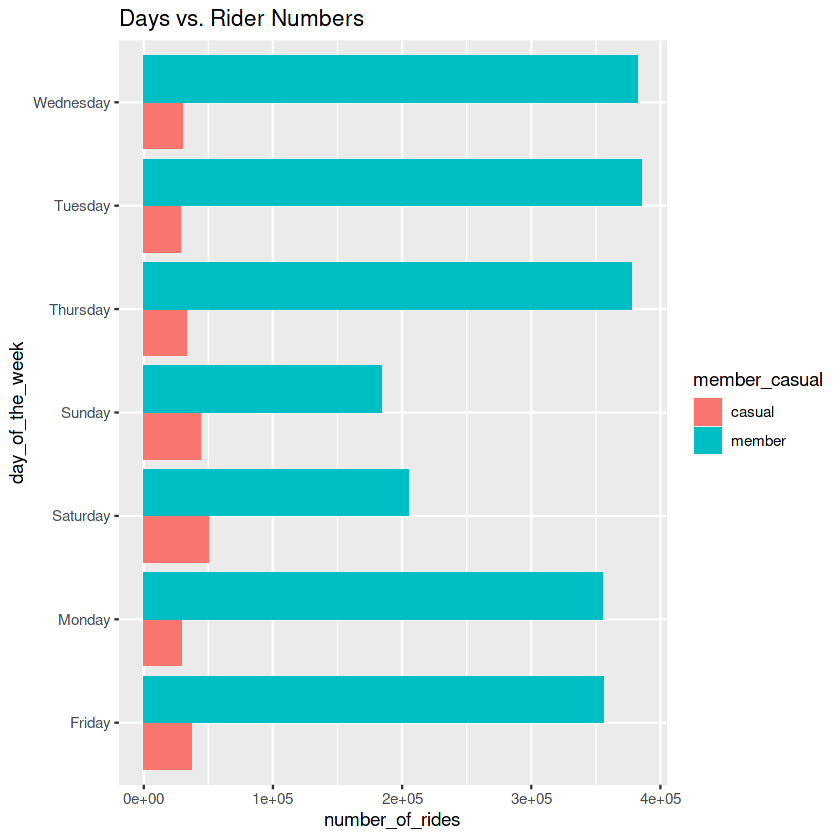

In [24]:
bike_trips_2019_v3 <- bike_trips_2019_v3 [-15,]
bike_trips_2019_v3 %>%
  ggplot(aes(x = day_of_the_week, y = number_of_rides, fill = member_casual)) +
geom_col(position = 'dodge') + coord_flip() + labs(title = 'Days vs. Rider Numbers')

In [25]:
bike_trips_2019_v4 <- bike_trips_2019_v2 %>% 
  group_by(member_casual, month) %>%
  summarise(number_of_rides = n(),
            average_duration = mean(tripduration))

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


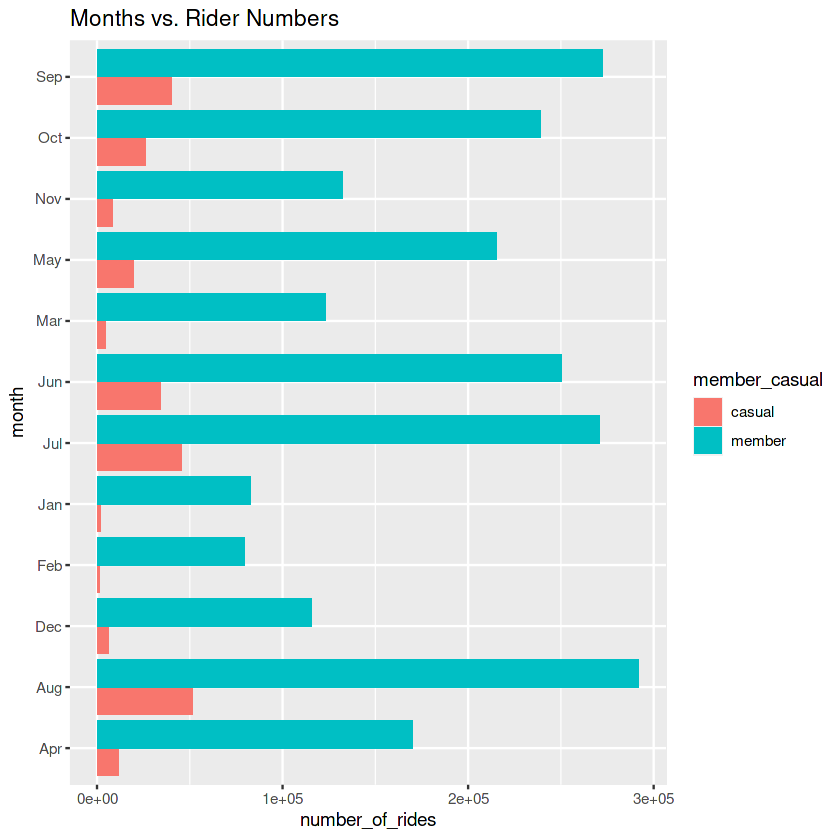

In [26]:
bike_trips_2019_v4 %>%
  ggplot(aes(x = month, y = number_of_rides, fill = member_casual)) + 
geom_col(position = 'dodge') + coord_flip() + labs(title = 'Months vs. Rider Numbers')

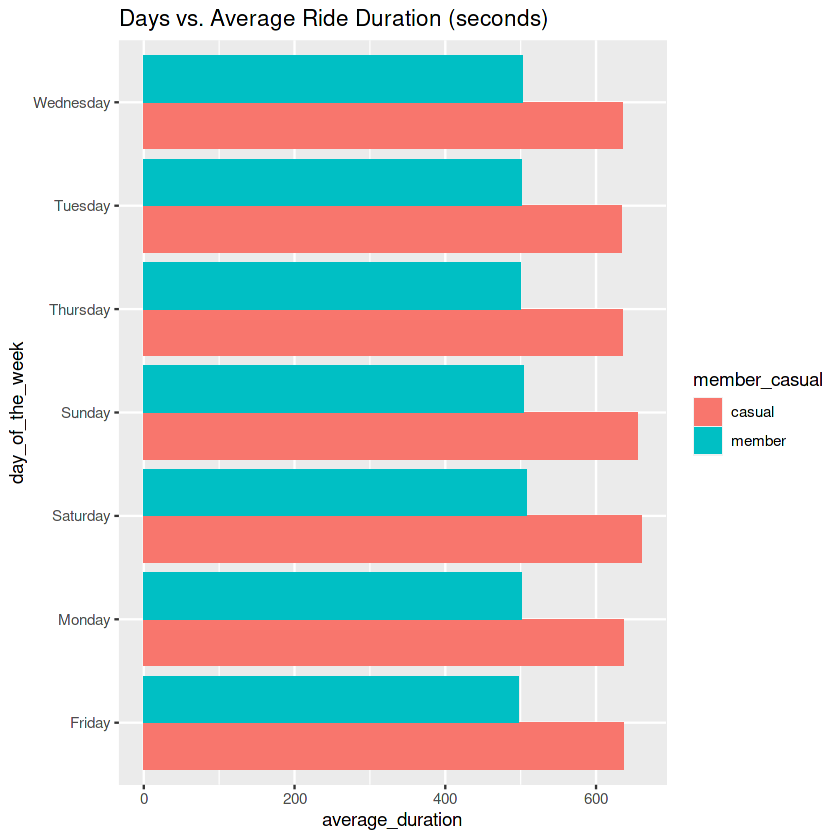

In [27]:
bike_trips_2019_v3 %>%
  ggplot(aes(x = day_of_the_week, y = average_duration, fill = member_casual)) +
geom_col(position = 'dodge') + coord_flip() + 
labs(title = 'Days vs. Average Ride Duration (seconds)')

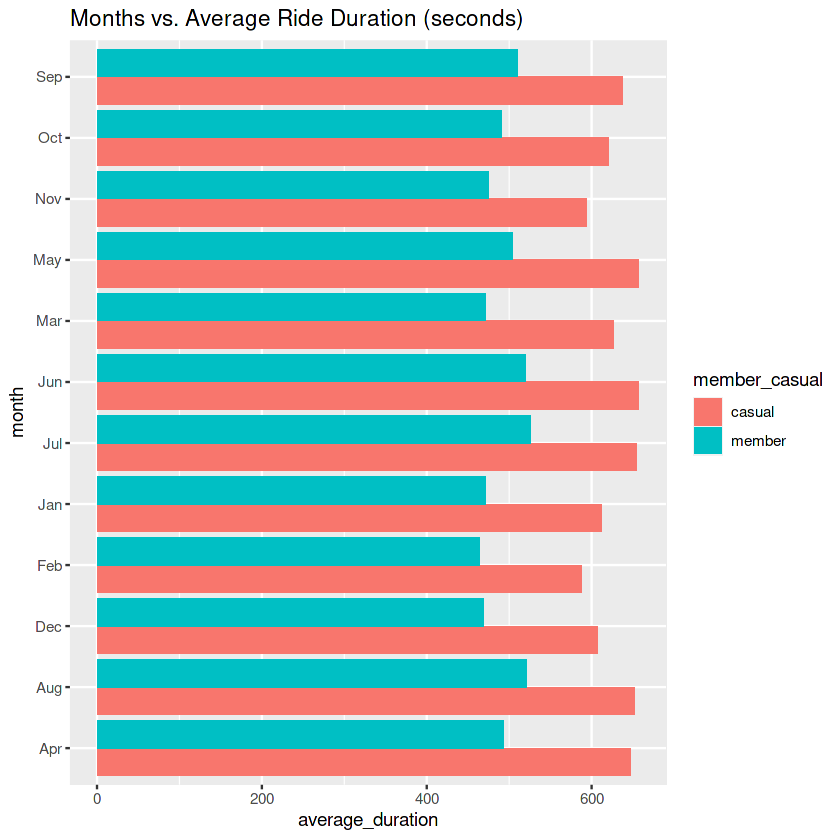

In [28]:
bike_trips_2019_v4 %>%
  ggplot(aes(x = month, y = average_duration, fill = member_casual)) + 
geom_col(position = 'dodge') + 
coord_flip() + labs(title = 'Months vs. Average Ride Duration (seconds)')

## Conclusion
I noticed Saturday and Sunday are the days with the highest number of rides for the casual group and also within the group of casual riders those days have the highest ride duration, most likely because they use the bikes for things like exercise and leisure activities. Also another thing I noticed in this data set is that in the months synonymous to the summer period the number of casual riders increase as well as the average ride duration of casual riders. I would suggest making discounted prices during the summer period, for incoming members to compel the casual group into subscribing to a membership plan and also creating exercise themed ads to encourage casual riders to become members.